In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
from sklearn.metrics import f1_score
import tensorflow as tf
import datetime

%load_ext autoreload
%autoreload 2
    
import ml_utils.road_seg as rs

Load raw images and ground truth

In [2]:
path_data = 'data'
path_train_dir = os.path.join(path_data, 'training')
path_train_label = os.path.join(path_data, 'test_set_images')
path_models = 'model'

if not os.path.exists(path_models):
    os.mkdir(path_models)
train_imgs, train_gt, val_imgs, val_gt, id_train, id_valid = rs.load_train_set(path_train_dir, ratio=0.8)

Generate smaller images for training

In [3]:
patch_size = 80
patch_tr, lab_tr,_ = rs.get_patches_all(train_imgs, train_gt, patch_size)
patch_val, lab_val,_ = rs.get_patches_all(val_imgs, val_gt, patch_size)

print('Shapes train: {},  test: {}'.format(patch_tr.shape, patch_val.shape))

Shapes train: (2000, 80, 80, 3),  test: (500, 80, 80, 3)


Take only part of train and validation set (should at least contain a part of the road)

In [4]:
useful_patches_tr, useful_lab_tr = rs.get_useful_patches(patch_tr, lab_tr, 0.2, 0.7)
useful_patches_val, useful_lab_val = rs.get_useful_patches(patch_val, lab_val, 0.2, 0.7)
useful_lab_tr = useful_lab_tr.astype(int)
useful_lab_val = useful_lab_val.astype(int)

print('Shapes train: {},  test: {}'.format(useful_patches_tr.shape, useful_patches_val.shape))

Shapes train: (788, 80, 80, 3),  test: (214, 80, 80, 3)


Display patches example with label ground truth

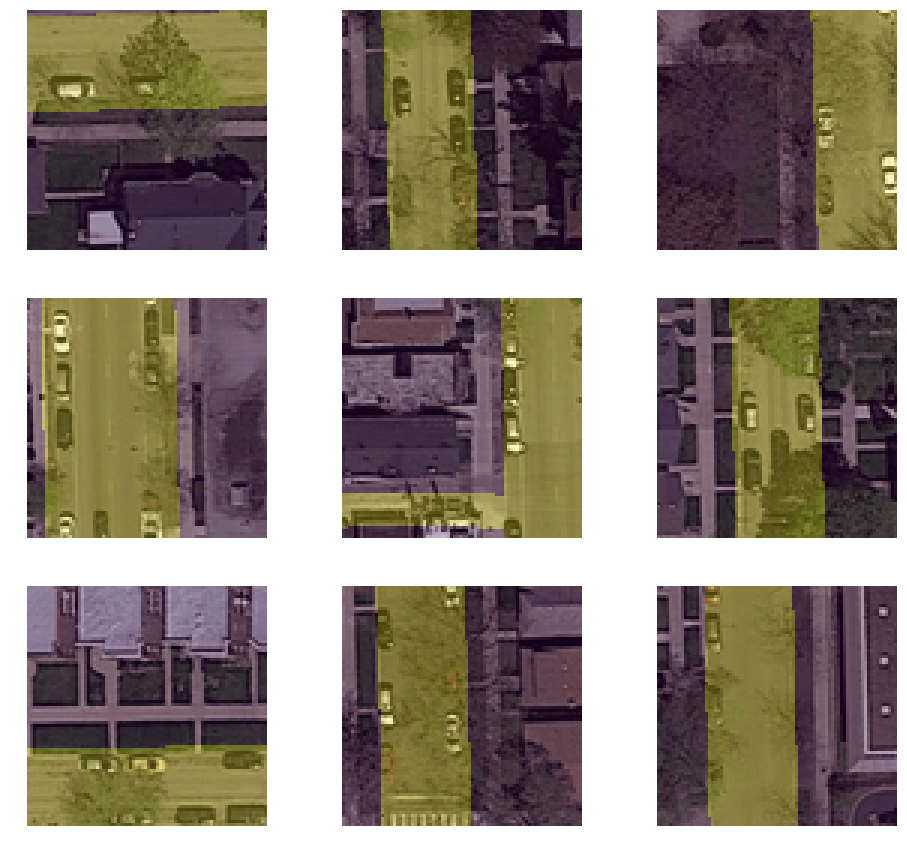

In [5]:
n_display = 9
id_display = np.random.permutation(len(useful_patches_tr))[:n_display]

plt.figure(figsize=(16, 5*(n_display//3)))
for i, id_ in enumerate(id_display):
    plt.subplot(n_display//3,3,i+1)
    plt.imshow(useful_patches_tr[id_]); plt.imshow(useful_lab_tr[id_], alpha=0.3); plt.axis('off');

In [6]:
import ml_utils.model as model

model.run_model(useful_patches_tr, useful_lab_tr, train_imgs, train_gt, val_imgs, val_gt, n_epoch=5)

conv1 size (?, ?, ?, 64)
pool1 size (?, ?, ?, 64)
conv2 size (?, ?, ?, 128)
pool2 size (?, ?, ?, 128)
conv3 size (?, ?, ?, 256)
pool3 size (?, ?, ?, 256)
conv4 size (?, ?, ?, 256)
pool4 size (?, ?, ?, 256)
deconv1 size (?, ?, ?, 256)
deconv2 size (?, ?, ?, 256)
deconv3 size (?, ?, ?, 128)
deconv4 size (?, ?, ?, 64)
score size (?, ?, ?, 2)
Recap epoch  1
	 last minibatch, cross entropy :  0.522242 reg term :  5.04742e-05
	 val_loss :  0.445818312466 , train_loss :  0.475014949217
	 val f1 :  0.675502867942 , train f1 :  0.631154219699
Recap epoch  2
	 last minibatch, cross entropy :  0.395083 reg term :  7.70859e-05
	 val_loss :  0.633225992322 , train_loss :  0.657655403018
	 val f1 :  0.66331483275 , train f1 :  0.636820975883
Recap epoch  3
	 last minibatch, cross entropy :  0.285102 reg term :  0.000118742
	 val_loss :  0.371252775192 , train_loss :  0.369064692408
	 val f1 :  0.764688775442 , train f1 :  0.755546801928
Recap epoch  4
	 last minibatch, cross entropy :  0.257446 reg 